In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [2]:
# load in the experimentally tested compounds from the round of testing commercially available molecules
round2 = pd.read_csv('../data/ML_curations_round2.csv')

# assess only the hits from this round
round2_hits = round2[[x < 1000 and y < 1000 for x,y in zip(round2['CFU_ml-Rep1'], round2['CFU_ml-Rep2'])]]
round2_hits

,Cpd_Number,MolPort ID,SMILES,LB_OD-Rep1,LB_OD-Rep2,LB_OD-Rep3,LB_FBS_OD-Rep1,LB_FBS_OD-Rep2,LB_FBS_OD-Rep3,CFU_ml-Rep1,CFU_ml-Rep2,Name,Vendor,IUPAC name,SMILES_from_MolPort
13,14,MolPort-047-514-438,Cl.Cl.COC1=CC=C2NC(CNCC3=CC=C(CCN)C=C3)=CC2=C1,0.0525,0.0618,0.5059,0.7897,0.8307,0.6505,142.0,142.0,69251390,ChemBridge Corporation,2-[4-({[(5-methoxy-1H-indol-2-yl)methyl]amino}...,Cl.Cl.COc1ccc2[nH]c(CNCc3ccc(CCN)cc3)cc2c1
15,16,MolPort-047-511-232,Cl.Cl.CN1C(CN2C[C@@H]3CCN[C@@H]3C2)=CC2=CC(C)=...,0.0457,0.0454,0.0470,0.8470,1.1980,1.1687,142.0,142.0,99546031,ChemBridge Corporation,"2-{[(3aS,6aS)-octahydropyrrolo[3,4-b]pyrrol-5-...",Cl.Cl.Cc1ccc2n(C)c(CN3C[C@@H]4CCN[C@@H]4C3)cc2c1
27,28,MolPort-015-163-751,Cl.[2H]C([2H])(NC([2H])([2H])C(O)C1CCC2=CC(F)=...,0.0668,0.3188,0.0866,0.0754,0.2207,0.0564,142.0,142.0,AG00AOO3,Angene (China),"1-(6-fluoro-3,4-dihydro-2H-1-benzopyran-2-yl)-...",Cl.OC(CNCC(O)C1CCc2cc(F)ccc2O1)C1CCc2cc(F)ccc2O1
29,30,MolPort-002-314-749,Cl.Cl.ClC1=CC=C(COC2=CC=C(CNCC3CCNCC3)C=C2)C=C1,0.0465,0.0470,0.0501,0.0534,0.0533,0.0465,142.0,142.0,AN-465/43384139,Specs,({4-[(4-chlorophenyl)methoxy]phenyl}methyl)[(p...,Cl.Cl.Clc1ccc(COc2ccc(CNCC3CCNCC3)cc2)cc1
30,31,MolPort-002-313-540,Clc1ccc(Cl)c(-c2ccc(CNCC3CCNCC3)o2)c1,0.0513,0.0525,0.0469,0.0484,0.0487,0.3766,142.0,142.0,AN-465/43384067,Specs,"{[5-(2,5-dichlorophenyl)furan-2-yl]methyl}[(pi...",Cl.Cl.Clc1ccc(Cl)c(c1)-c1ccc(CNCC2CCNCC2)o1


In [3]:
# display additional information about each one of these hits
for i, row in round2_hits.iterrows():
    print('****************************')
    print(row['Name'])
    print(row['MolPort ID'])
    print(row['Vendor'])

****************************
69251390
MolPort-047-514-438
ChemBridge Corporation
****************************
99546031
MolPort-047-511-232
ChemBridge Corporation
****************************
AG00AOO3
MolPort-015-163-751
Angene (China)
****************************
AN-465/43384139
MolPort-002-314-749
Specs
****************************
AN-465/43384067
MolPort-002-313-540
Specs


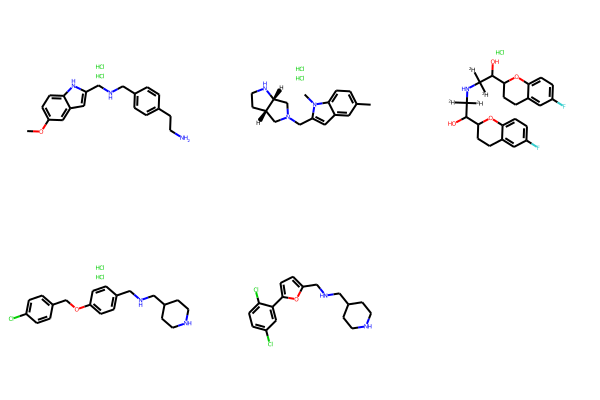

In [4]:
# draw the molecules so we can get a closer look at structure for hits
mols = [Chem.MolFromSmiles(smi) for smi in round2_hits['SMILES']]
molsPerRow = 2
subImgSize= (500,500)
nRows = 3
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1], subImgSize[0], subImgSize[1])
d2d.drawOptions().legendFontSize=100
#d2d.drawOptions().useBWAtomPalette()
d2d.DrawMolecules(mols)
d2d.FinishDrawing()
open('../figure_panels/2E_round2_ml_structures.png','wb+').write(d2d.GetDrawingText())
display(Draw.MolsToGridImage(mols)) # higher resolution image for figure written to file

In [5]:
# write the hit information as well
round2_hits = round2_hits.reset_index(drop=True)
round2_hits.to_csv('../out/round2_ML_curated_hits.csv', index = False)